In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Rense data (gjort for oss av Ingeborg)

In [11]:
data_frame = pd.read_csv("lego.population.csv", sep =",", encoding ="latin1")
# fjerner forklaringsvariabler vi ikke trenger
lego_set_data = data_frame[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
lego_set_data = lego_set_data.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
lego_set_data['Theme'] = lego_set_data['Theme'].astype(str)
lego_set_data['Theme'] = lego_set_data['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
lego_set_data['Price'] = lego_set_data['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
lego_set_data['Price'] = lego_set_data['Price'].astype(float)

lego_set_data

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


### A. Unike brikker beskrevet av (totalt) antall brikker (Enkel lineær regresjon)

In [12]:
# enkel lineær regresjon
formel = 'Unique_Pieces ~ Pieces'

model = smf.ols(formel, data = lego_set_data)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     2180.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          6.72e-219
Time:                        10:22:48   Log-Likelihood:                -3894.2
No. Observations:                 714   AIC:                             7792.
Df Residuals:                     712   BIC:                             7802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7744      2.632     27.267      0.000      66.607      76.942
Pieces         0.1763      0.004     46.692      0.000       0.169       0.184
==============================================================================
Omnibus:                      276.678   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9691.463
Skew:                          -1.054   Prob(JB):                         0.00
Kurtosis:                      20.925   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

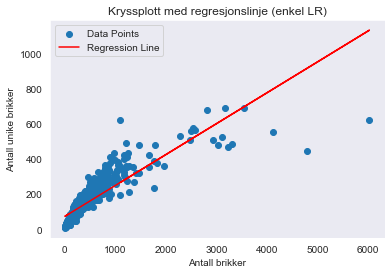

In [13]:
slope = result.params['Pieces']
intercept = result.params['Intercept']

regression_x = np.array(lego_set_data['Pieces'])
regression_y = slope * regression_x + intercept

plt.scatter(lego_set_data['Pieces'], lego_set_data['Unique_Pieces'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

### B. Unike brikker beskrevet av antall brikker og pris (Multippel lineær regresjon)

In [41]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Unique_Pieces ~ Pieces + category' , data = lego_set_data)
modell3_mlr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     728.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          3.57e-216
Time:                        11:08:23   Log-Likelihood:                -3892.8
No. Observations:                 714   AIC:                             7794.
Df Residuals:                     710   BIC:                             7812.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 68.7279      3.384     20.310      0.000      62.084      75.371
category[T.Other]          5.0644      4.418      1.146      0.252      -3.610      13.739
category[T.VideoGames]    12.7691      8.763      1.457      0.146      -4.436      29.974
Pieces                     0.1765      0.004     46.707      0.000       0.169       0.184
==============================================================================
Omnibus:                      277.189   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9684.641
Skew:                          -1.058   Prob(JB):                         0.00
Kurtosis:                      20.918   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### C. Unike brikker beskrevet av antall brikker, med egne parametere for hver gruppe (Film/TV-serier, spill, ingen av delene)
### a. Egen modell for hver gruppe (3x Enkel lineær regresjon)

In [15]:
# Groups the themes together and creates corresponding arrays
film_tv_themes = ['NINJAGO', 'Star Wars', 'Batman', 'DC', 'Disney', 'Jurassic World', 'LEGO Frozen 2', 'Marvel', 'Minions', 'Monkie Kid', 'Powerpuff Girls', 'Spider-Man', 'Stranger Things', 'THE LEGO MOVIE 2', 'Trolls World Tour', 'Unikitty', 'Harry Potter']

video_games_themes = ['Hidden Side', 'Minecraft', 'Overwatch']

other_themes = ['City', 'Friends', 'Classic', 'Creator 3-in-1', 'Creator Expert', 'DUPLO', 'Ideas', 'Juniors', 'Minifigures', 'Powered UP', 'Speed Champions']

film_tv = lego_set_data[lego_set_data['Theme'].isin(film_tv_themes)]
video_games = lego_set_data[lego_set_data['Theme'].isin(video_games_themes)]
other = lego_set_data[lego_set_data['Theme'].isin(other_themes)]


In [16]:
# Puts the previously grouped themes in an array of the categories film/tv, video games and other
lego_set_data['category'] = np.where(lego_set_data['Theme'].isin(film_tv_themes), 'Film/Tv',
                                np.where(lego_set_data['Theme'].isin(video_games_themes), 'VideoGames', 'Other'))
lego_set_data.groupby(['category']).size().reset_index(name ='Count')

,category,Count
0,Film/Tv,371
1,Other,296
2,VideoGames,47


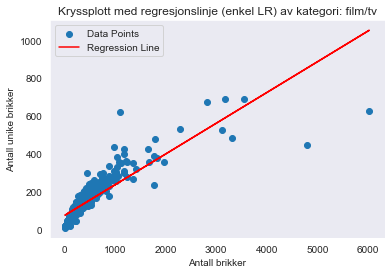

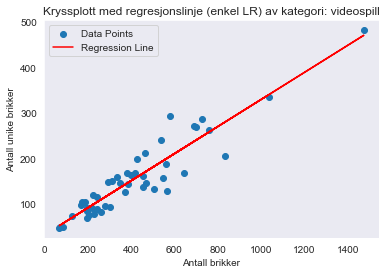

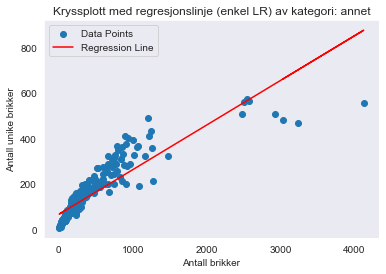

In [17]:


for media in [film_tv, video_games, other]:
    kategori = ""
    if media['Theme'].count() == film_tv['Theme'].count():
        kategori = "film/tv"
    elif media['Theme'].count() == video_games['Theme'].count():
        kategori = "videospill"
    elif media['Theme'].count() == other['Theme'].count():
        kategori = "annet"

    model = smf.ols('Unique_Pieces ~ Pieces', data = media)
    result = model.fit()

    slope = result.params['Pieces']
    intercept = result.params['Intercept']

    regression_x = np.array(media['Pieces'])
    regression_y = slope * regression_x + intercept

    plt.scatter(media['Pieces'], media['Unique_Pieces'], label='Data Points')
    plt.plot(regression_x, regression_y, color='red', label='Regression Line')
    plt.xlabel('Antall brikker')
    plt.ylabel('Antall unike brikker')
    plt.title(f"Kryssplott med regresjonslinje (enkel LR) av kategori: {kategori}")
    plt.legend()
    plt.grid()
    plt.show()

### b. Kun eget skjæringspunkt (Multippel lineær regresjon)

# grupperer temaene

In [0]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Unique_Pieces ~ Pieces + category' , data = lego_set_data)
modell3_mlr.fit().summary()


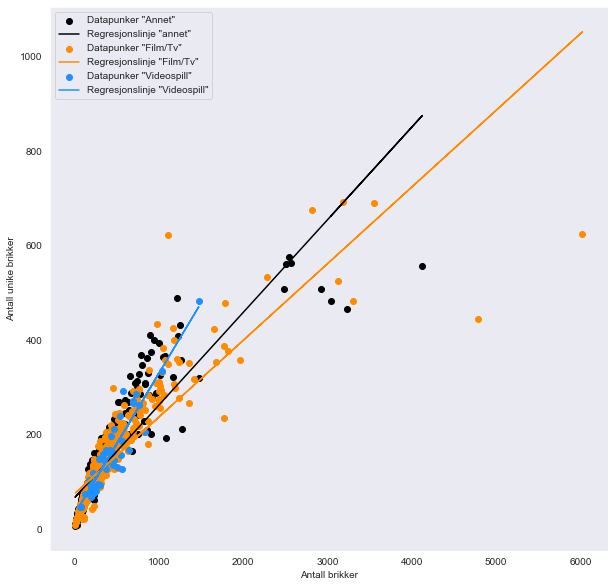

In [64]:
# creates the plot of the linear model: unique_pieces ~ pieces * category 
model_film = smf.ols('Unique_Pieces ~ Pieces', data = film_tv)
result_film = model_film.fit()

slope_film = result_film.params['Pieces']
intercept_film = result_film.params['Intercept']
regression_x_film = np.array(film_tv['Pieces'])
regression_y_film = slope_film * regression_x_film + intercept_film

model_game = smf.ols('Unique_Pieces ~ Pieces', data = video_games)
result_game = model_game.fit()

slope_game = result_game.params['Pieces']
intercept_game = result_game.params['Intercept']
regression_x_game = np.array(video_games['Pieces'])
regression_y_game = slope_game * regression_x_game + intercept_game

model_other = smf.ols('Unique_Pieces ~ Pieces', data = other)
result_other = model_other.fit()

slope_other = result_other.params['Pieces']
intercept_other = result_other.params['Intercept']
regression_x_other = np.array(other['Pieces'])
regression_y_other = slope_other * regression_x_other + intercept_other

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(other['Pieces'], other['Unique_Pieces'], label='Datapunker "Annet"', color='black')
plt.plot(regression_x_other, regression_y_other, color='black', label='Regresjonslinje "annet"')

plt.scatter(film_tv['Pieces'], film_tv['Unique_Pieces'], label='Datapunker "Film/Tv"', color='darkorange')
plt.plot(regression_x_film, regression_y_film, color='darkorange', label='Regresjonslinje "Film/Tv"')

plt.scatter(video_games['Pieces'], video_games['Unique_Pieces'], label='Datapunker "Videospill"', color='dodgerblue')
plt.plot(regression_x_game, regression_y_game, color='dodgerblue', label='Regresjonslinje "Videospill"')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')

plt.legend()
plt.grid()
plt.show()

### c. Eget skjæringspunkt og stigningstall (Multippel lineær regresjon med interaksjon)

In [59]:
modell4_mlr = smf.ols('Unique_Pieces ~ Pieces * category' , data = lego_set_data)
model4_result = modell4_mlr.fit()
model4_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique_Pieces   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     464.6
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          8.99e-221
Time:                        20:00:51   Log-Likelihood:                -3875.4
No. Observations:                 714   AIC:                             7763.
Df Residuals:                     708   BIC:                             7790.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        75.0467      3.544     21.173      0.000      68.088      82.005
category[T.Other]                -8.6194      5.312     -1.623      0.105     -19.049       1.810
category[T.VideoGames]          -43.6238     15.372     -2.838      0.005     -73.804     -13.444
Pieces                            0.1623      0.005     34.694      0.000       0.153       0.171
Pieces:category[T.Other]          0.0338      0.008      4.384      0.000       0.019       0.049
Pieces:category[T.VideoGames]     0.1357      0.031      4.390      0.000       0.075       0.196
==============================================================================
Omnibus:                      203.421   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5371.490
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                      16.373   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

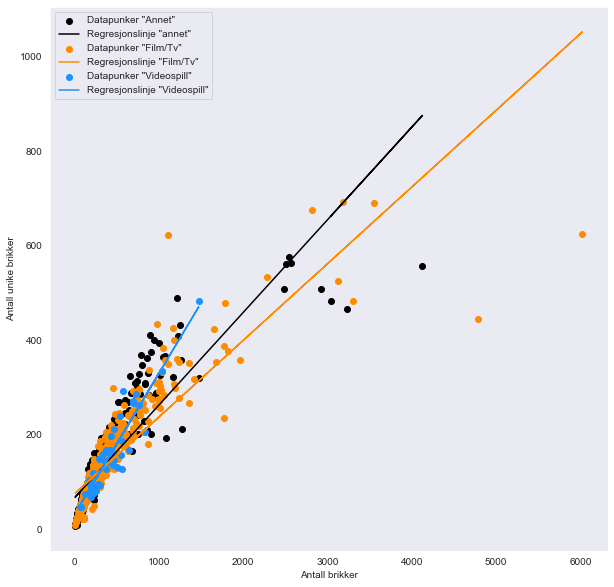

In [63]:
# creates the plot of the linear model, with interaction: unique_pieces ~ pieces * category 
intercept_common = model4_result.params['Intercept']
slope_common =  model4_result.params['Pieces']

# regression line for film/tv
slope_film = slope_common
intercept_film = intercept_common
regression_x_film = np.array(film_tv['Pieces'])
regression_y_film = slope_film * regression_x_film + intercept_film


# regression line for video games
slope_game = slope_common + model4_result.params['Pieces:category[T.VideoGames]']
intercept_game = intercept_common + model4_result.params['category[T.VideoGames]']
regression_x_game = np.array(video_games['Pieces'])
regression_y_game = slope_game * regression_x_game + intercept_game


# regression line for other
slope_other = slope_common + model4_result.params['Pieces:category[T.Other]']
intercept_other = intercept_common + model4_result.params['category[T.Other]']
regression_x_other = np.array(other['Pieces'])
regression_y_other = slope_other * regression_x_other + intercept_other

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(other['Pieces'], other['Unique_Pieces'], label='Datapunker "Annet"', color='black')
plt.plot(regression_x_other, regression_y_other, color='black', label='Regresjonslinje "annet"')

plt.scatter(film_tv['Pieces'], film_tv['Unique_Pieces'], label='Datapunker "Film/Tv"', color='darkorange')
plt.plot(regression_x_film, regression_y_film, color='darkorange', label='Regresjonslinje "Film/Tv"')

plt.scatter(video_games['Pieces'], video_games['Unique_Pieces'], label='Datapunker "Videospill"', color='dodgerblue')
plt.plot(regression_x_game, regression_y_game, color='dodgerblue', label='Regresjonslinje "Videospill"')
plt.xlabel('Antall brikker')
plt.ylabel('Antall unike brikker')

plt.legend()
plt.grid()
plt.show()

In [ ]:
lego_set_data['pieces_film/tv'] = lego_set_data['Pieces'] * film_tv
lego_set_data['pieces_video_game'] = lego_set_data['Pieces'] * video_games
lego_set_data['other'] = lego_set_data['Pieces'] * other
